In [10]:
import pandas as pd

# load the training dataset (excluding rows with null values)
seed = pd.read_csv('data/seeds.csv').dropna();

# Deep Learning models work best when features are on similar scales
# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1, 3):
    seed = pd.concat([seed, seed])

# Display a random sample of 10 observations
sample = seed.sample(10)
sample

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
187,10.91,12.80,0.8372,5.088,2.675,4.179,4.956,2
53,14.33,14.28,0.8831,5.504,3.199,3.328,5.224,0
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
124,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
161,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
189,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,2
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060,1
63,13.22,13.84,0.8680,5.395,3.070,4.157,5.088,0
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,1
198,12.62,13.67,0.8481,5.410,2.911,3.306,5.231,2


In [11]:
seed_classes = ['Area', 'Perimeter', 'Compactness']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in seed.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',seed_classes[int(row[-1])])

['area' 'perimeter' 'compactness' 'kernel_length' 'kernel_width'] SpeciesName
[ 17.99 15.86 0.8992 5.89 3 ] Perimeter
[ 15.88 14.9 0.8988 5.618 3 ] Area
[ 15.38 14.77 0.8857 5.662 3 ] Area
[ 13.32 13.94 0.8613 5.541 3 ] Compactness
[ 13.84 13.94 0.8955 5.324 3 ] Area
[ 13.94 14.17 0.8728 5.585 3 ] Area
[ 12.46 13.41 0.8706 5.236 3 ] Compactness
[ 12.8 13.47 0.886 5.16 3 ] Compactness
[ 12.7 13.71 0.8491 5.386 2 ] Compactness
[ 15.5 14.86 0.882 5.877 3 ] Area


C:\Users\Computer\AppData\Local\Temp\ipykernel_16168\3319855594.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',seed_classes[int(row[-1])])


In [12]:
from sklearn.model_selection import train_test_split

features = ['area','perimeter','compactness','kernel_length','kernel_width']
label = 'species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(seed[features].values,
                                                    seed[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")
# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + seed_classes[y_train[n]] + ')')

Training Set: 588, Test Set: 252 

Sample of features and labels:
[14.46   14.35    0.8818  5.388   3.377 ] 0 (Area)
[11.27   12.97    0.8419  5.088   2.763 ] 2 (Compactness)
[11.02   13.      0.8189  5.325   2.701 ] 2 (Compactness)
[10.91   12.8     0.8372  5.088   2.675 ] 2 (Compactness)
[10.79   12.93    0.8107  5.317   2.648 ] 2 (Compactness)
[12.05   13.41    0.8416  5.267   2.847 ] 2 (Compactness)
[14.69   14.49    0.8799  5.563   3.259 ] 0 (Area)
[11.26   13.01    0.8355  5.186   2.71  ] 2 (Compactness)
[18.94  16.49   0.875  6.445  3.639] 1 (Perimeter)
[11.36   13.05    0.8382  5.175   2.755 ] 2 (Compactness)
[12.62   13.67    0.8481  5.41    2.911 ] 2 (Compactness)
[13.22  13.84   0.868  5.395  3.07 ] 0 (Area)
[17.08   15.38    0.9079  5.832   3.683 ] 0 (Area)
[12.78   13.57    0.8716  5.262   3.026 ] 0 (Area)
[17.99   15.86    0.8992  5.89    3.694 ] 1 (Perimeter)
[14.11   14.26    0.8722  5.52    3.168 ] 0 (Area)
[12.89   13.77    0.8541  5.495   3.026 ] 2 (Compactness)
[13.

In [14]:
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 660.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.4 MB 656.4 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.4 MB 726.2 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.4 MB 908.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.4 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.4 MB 1.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.4 MB 1.7 MB/s eta 0:00:02
   ------------ --------------------------- 0.7/2.4 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.1/2.4 MB 2.5 MB/s eta 0:00:01
   -----------

In [4]:
!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0


Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.2.0-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.17.0-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/198.5 MB 9.2 MB/s eta 0:00:22
   ---------------------------------------- 0.5/198.5 MB 8.1 MB/s eta 0:00:25
   ---------------------------------------- 0.8/198.5 MB 7.0 MB/s eta 0:00:29
   ---------------------------------------- 1.1/198.5 MB 6.4 MB/s eta 0:00:31
   ---------------------------------------- 1.3/198.5 MB 6.4 MB/s eta 0:00:31
   ---------------------------------------- 1.6/198.5 MB 6.4 MB/s eta 0:00:31
   ---------------------------------------- 2.0/198.5 MB 6.2 MB/s eta 0:00:32
   ---------------------------------------- 2.2/198.5 MB 5.8 MB/s eta 0:00:34
    --------------------------------------- 2.5/198.5 MB 5.9 MB/s eta 0:00:34
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.2.0+cpu


## Prepare the data for PyTorch


In [14]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


## Define a neural network


In [15]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class SeedNet(nn.Module):
    def __init__(self):
        super(SeedNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(seed_classes))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = SeedNet()
print(model)

SeedNet(
  (fc1): Linear(in_features=5, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


## Train the model


In [16]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

C:\Users\Computer\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 1
Training set: Average loss: 1.110561
Validation set: Average loss: 1.087681, Accuracy: 67/252 (27%)

Epoch: 2
Training set: Average loss: 1.060915
Validation set: Average loss: 1.086252, Accuracy: 67/252 (27%)

Epoch: 3
Training set: Average loss: 1.044690
Validation set: Average loss: 1.071387, Accuracy: 67/252 (27%)

Epoch: 4
Training set: Average loss: 1.025358
Validation set: Average loss: 1.050495, Accuracy: 86/252 (34%)

Epoch: 5
Training set: Average loss: 1.001793
Validation set: Average loss: 1.024955, Accuracy: 133/252 (53%)

Epoch: 6
Training set: Average loss: 0.975078
Validation set: Average loss: 0.997424, Accuracy: 153/252 (61%)

Epoch: 7
Training set: Average loss: 0.944178
Validation set: Average loss: 0.966220, Accuracy: 155/252 (62%)

Epoch: 8
Training set: Average loss: 0.909418
Validation set: Average loss: 0.933180, Accuracy: 155/252 (62%)

Epoch: 9
Training set: Average loss: 0.870780
Validation set: Average loss: 0.895904, Accuracy: 155/252 (62%)

Epoch

## Evaluate model performance


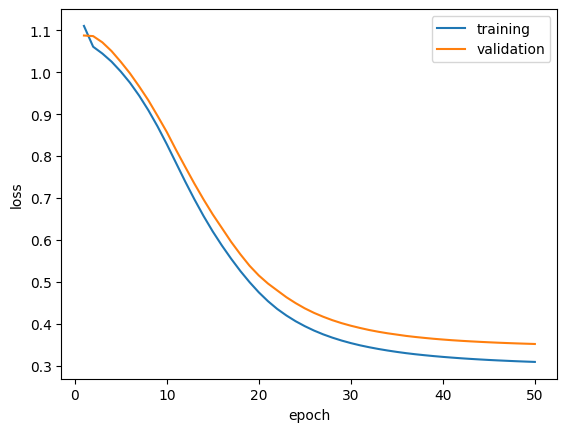

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

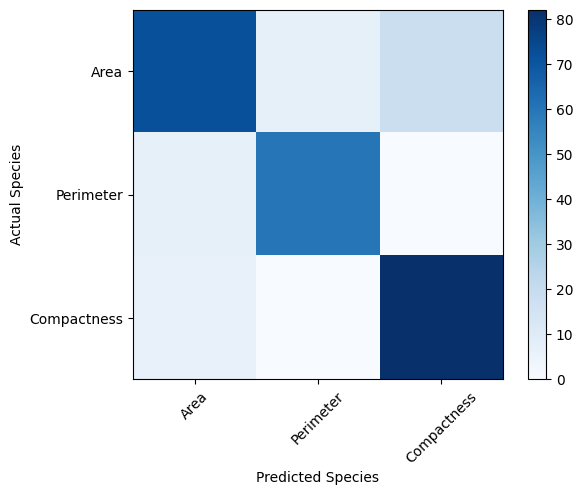

In [19]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(seed_classes))
plt.xticks(tick_marks, seed_classes, rotation=45)
plt.yticks(tick_marks, seed_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()